In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = "./module_5_auto.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
# just use the numeric data
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel("Price (in dollars)")
    plt.ylabel("Proportion of Cars")
    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    # training data
    # testing data
    # lr:  linear regression object
    # poly_transform:  polynomial transformation object

    xmax = max([xtrain.values.max(), xtest.values.max()])

    xmin = min([xtrain.values.min(), xtest.values.min()])

    x = np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, y_train, "ro", label="Training Data")
    plt.plot(xtest, y_test, "go", label="Test Data")
    plt.plot(
        x,
        lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))),
        label="Predicted Function",
    )
    plt.ylim([-10000, 60000])
    plt.ylabel("Price")
    plt.legend()

Part 1: Training and Testing

In [8]:
y_data = df["price"]
x_data = df.drop("price", axis=1)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)

x_train.shape, x_test.shape

((180, 20), (21, 20))

Question 1

In [11]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(
    x_data, y_data, test_size=0.4, random_state=0
)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lre = LinearRegression()

# fit the model using "horsepower"
lre.fit(x_train[["horsepower"]], y_train)

# calculate R^2
r2_score = lre.score(x_test[['horsepower']], y_test)
print("r2 score:", r2_score)

r2 score: 0.3635875575078824


In [16]:
# find R^2 score on the testing data using 40% of dataset for testing
lre.fit(x_train1[["horsepower"]], y_train1)
lre.score(x_test1[["horsepower"]], y_test1)

0.7139364665406973

Cross-Validation Score

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
Rcross = cross_val_score(lre, x_data[["horsepower"]], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [19]:
from sklearn.model_selection import cross_val_predict

In [20]:
y_pred = cross_val_predict(lre, x_data[["horsepower"]], y_data, cv=4)
y_pred[:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

Part 2: Overfitting, Underfitting and Model Selection

In [21]:
lr = LinearRegression()
lr.fit(x_train[["horsepower", "curb-weight", "engine-size", "highway-mpg"]], y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(x_test[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])
y_pred[:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [23]:
yhat_train = lr.predict(
    x_train[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
)
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

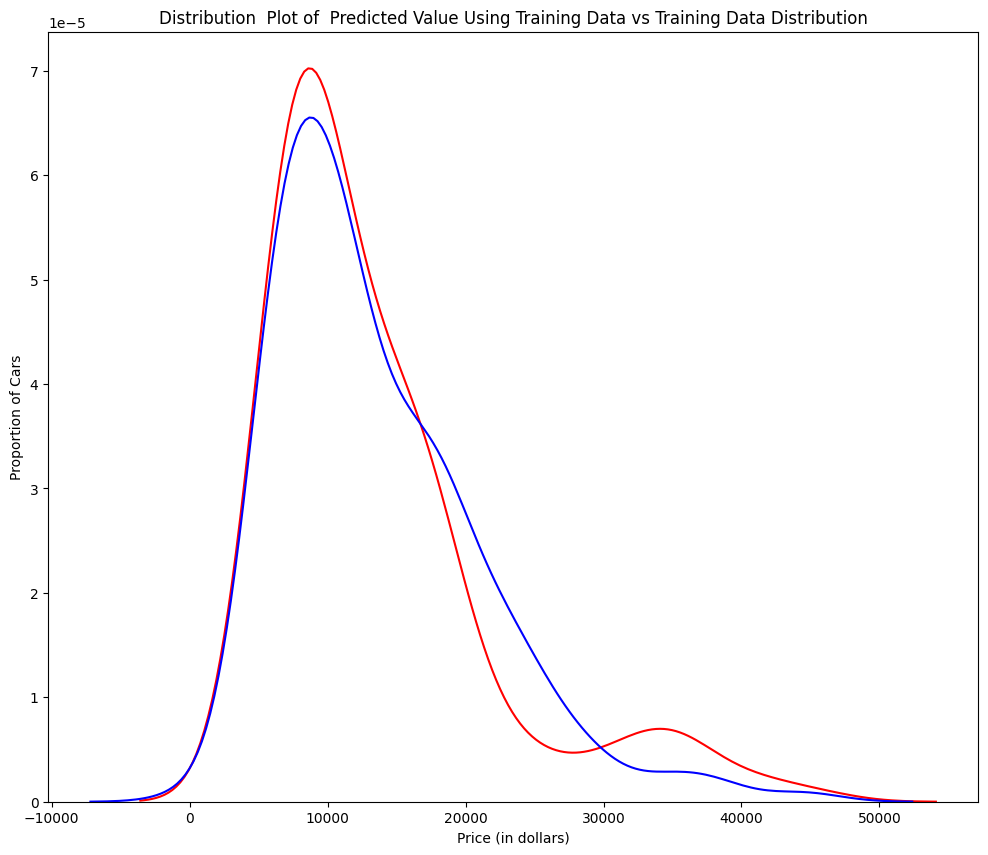

In [26]:
# examine the distribution of the predicted values of the training data
Title = "Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution"
DistributionPlot(
    y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title
)

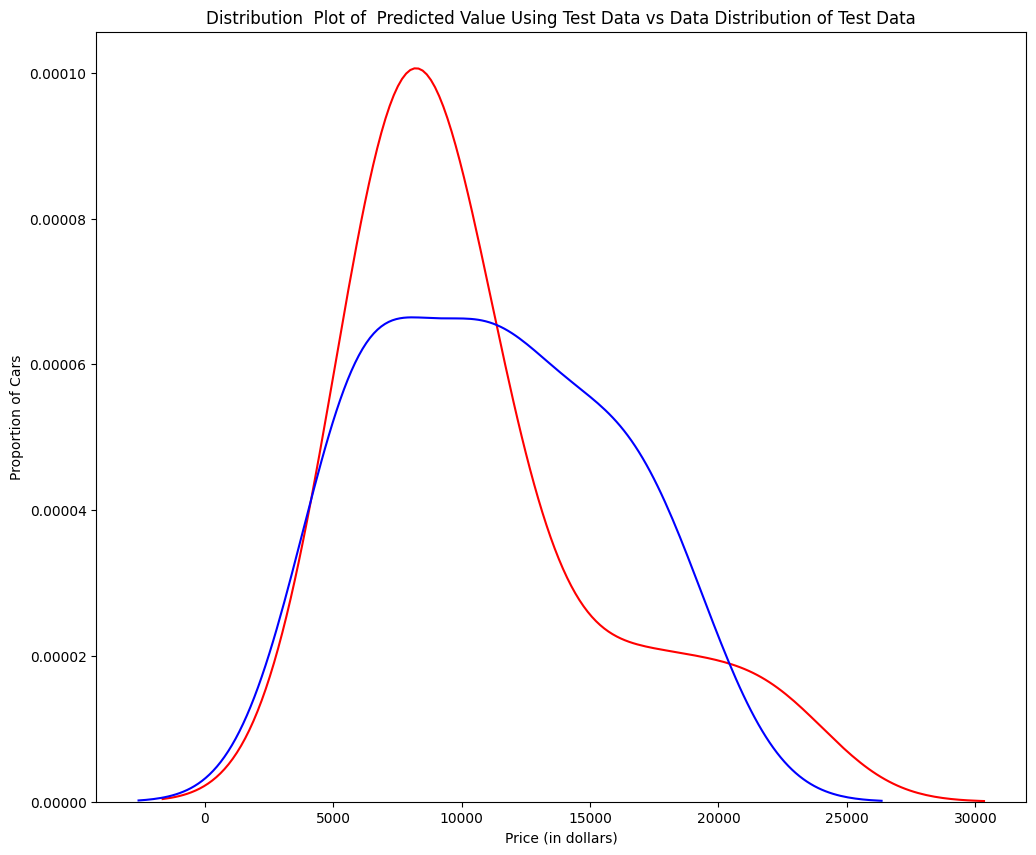

In [27]:
Title = "Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data"
DistributionPlot(
    y_test, y_pred, "Actual Values (Test)", "Predicted Values (Test)", Title
)

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

Overfitting

In [28]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.45, random_state=0
)

In [29]:
from sklearn.preprocessing import PolynomialFeatures


# we will perform a degree 5 polynomial transformation on the feature 'horsepower'
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[["horsepower"]])
x_test_pr = pr.fit_transform(x_test[["horsepower"]])
pr

PolynomialFeatures(degree=5)

In [30]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [31]:
y_hat = poly.predict(x_test_pr)

array([ 6728.76886019,  7308.09139872, 12213.83436834, 18893.07383936,
       19995.74674131])

In [33]:
# compare to actual targets
print(y_hat[:5])
print(y_test[:5].values)

[ 6728.76886019  7308.09139872 12213.83436834 18893.07383936
 19995.74674131]
[ 6295. 10698. 13860. 13499. 15750.]


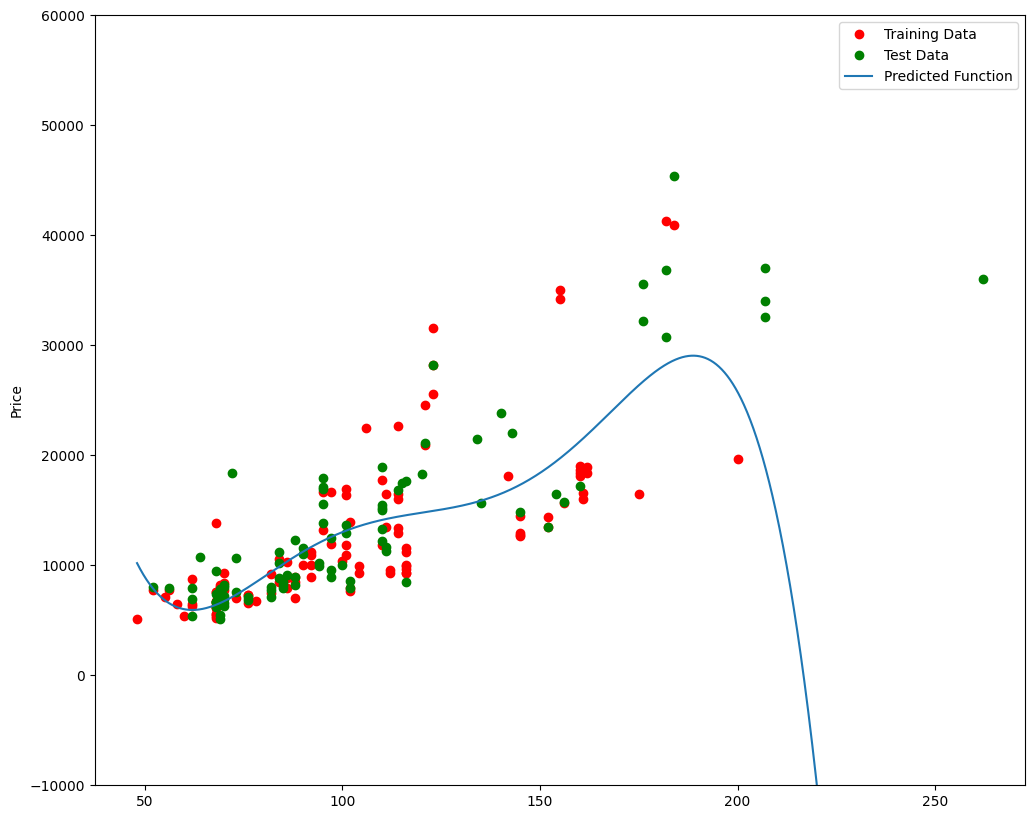

In [34]:
PollyPlot(x_train["horsepower"], x_test["horsepower"], y_train, y_test, poly, pr)

In [35]:
# R2
r2_train = poly.score(x_train_pr, y_train)
r2_test = poly.score(x_test_pr, y_test)
print("r2 train: ", r2_train)
print("r2_test", r2_test)

r2 train:  0.5567716900301583
r2_test -29.871801847610115


We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2')

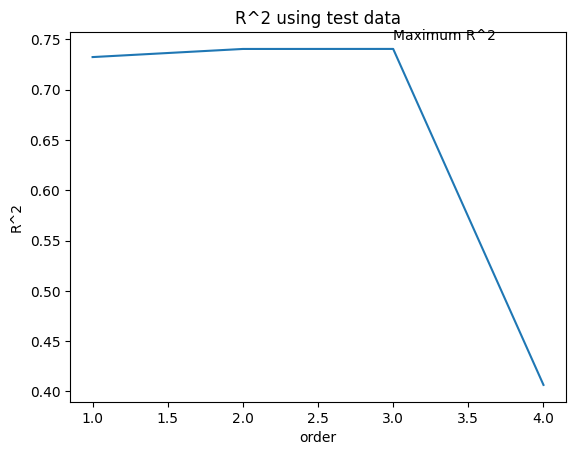

In [36]:
# testing with different order polynomials
Rsqu_test = []
order = [1, 2, 3, 4]

for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[["horsepower"]])
    x_test_pr = pr.fit_transform(x_test[["horsepower"]])

    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel("order")
plt.ylabel("R^2")
plt.title("R^2 using test data")
plt.text(3, 0.75, "Maximum R^2")

Part 3: Grid Search

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
parameters1 = [{"alpha": [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [39]:
from sklearn.linear_model import Ridge

In [40]:
RR = Ridge()
RR

Ridge()

In [41]:
grid = GridSearchCV(RR, parameters1, cv=4)

In [42]:
grid.fit(x_data[["horsepower", "curb-weight", "engine-size", "highway-mpg"]], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [44]:
bestRR = grid.best_estimator_
bestRR

Ridge(alpha=10000)

In [45]:
bestRR.score(
    x_test[["horsepower", "curb-weight", "engine-size", "highway-mpg"]], y_test
)

0.8411649831036151